In [695]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold,cross_val_score,ShuffleSplit,train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt # for data visualization
import plotly.express as px # for data visualization

In [696]:
df = pd.read_csv(r'C:\Users\ansht\Desktop\Training Data.csv')


Reducing oversampling-for-imbalanced-classification

In [697]:
df1 = df[df['risk_flag']==0]
df2 = df[df['risk_flag']==1]

from sklearn.utils import shuffle
df1 = shuffle(df1)
df1=df1.reset_index()
df1 = df1.iloc[0:100000,:]

df1 = df1.drop('index',axis=1)

df = pd.concat([df1,df2],ignore_index=True)
df=shuffle(df)
df=df.reset_index()

df = df.drop('index',axis=1)

df1 = df[df['risk_flag']==1]
df = pd.concat([df,df1],ignore_index=True)

df=shuffle(df)
df=df.reset_index()
df = df.drop('index',axis=1)
df['risk_flag'].value_counts()

0    100000
1     61992
Name: risk_flag, dtype: int64

# DATA ANALYSIS

In [698]:
data=df
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,32783,549476,47,1,single,rented,no,Fashion_Designer,Dhule,Maharashtra,1,10,1
1,74143,9675070,56,19,single,rented,yes,Psychologist,Sasaram[30],Bihar,3,10,1
2,201982,1056300,24,19,single,rented,yes,Industrial_Engineer,Mathura,Uttar_Pradesh,13,13,0
3,4927,6335707,26,0,married,rented,no,Industrial_Engineer,Machilipatnam,Andhra_Pradesh,0,12,0
4,107132,6105859,44,18,single,rented,no,Design_Engineer,Shimla,Himachal_Pradesh,10,14,0


In [699]:
df.shape

(161992, 13)

In [700]:
df.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,161992.000000,1.619920e+05,161992.000000,161992.000000,161992.000000,161992.000000,161992.000000
mean,127836.863740,4.992745e+06,49.680194,9.933491,6.290187,11.996395,0.382686
std,75191.116644,2.886607e+06,17.160533,6.030282,3.676749,1.398834,0.486044
min,2.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,62227.500000,2.485396e+06,34.000000,5.000000,3.000000,11.000000,0.000000
50%,127501.500000,4.994098e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,196379.000000,7.499539e+06,65.000000,15.000000,9.000000,13.000000,1.000000
max,252000.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [701]:
df.nunique()
df.columns

Index(['Id', 'income', 'age', 'experience', 'married', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_years',
       'current_house_years', 'risk_flag'],
      dtype='object')

In [702]:

object_cols = ['Id','city','car_ownership','house_ownership','married','current_job_years','current_house_years','experience','state','profession']

for i in object_cols:
    print("column name : {}".format(i))
    print("Number of unique columns of ", i, ":{}".format(df[i].nunique()))
    print("Values of unique", i, "is below: \n{}".format(df[i].value_counts()))
    print("------------------------------------------------------------------------")

column name : Id
Number of unique columns of  Id :130996
Values of unique Id is below: 
32783     2
177124    2
136722    2
110504    2
235842    2
         ..
165963    1
241458    1
127906    1
173531    1
208758    1
Name: Id, Length: 130996, dtype: int64
------------------------------------------------------------------------
column name : city
Number of unique columns of  city :317
Values of unique city is below: 
Srinagar            858
Indore              848
Satna               841
Bhopal              796
Kochi               795
                   ... 
Tadipatri           283
Sultan_Pur_Majra    275
Warangal[11][12]    241
Karaikudi           238
Katni               227
Name: city, Length: 317, dtype: int64
------------------------------------------------------------------------
column name : car_ownership
Number of unique columns of  car_ownership :2
Values of unique car_ownership is below: 
no     114463
yes     47529
Name: car_ownership, dtype: int64
------------------------

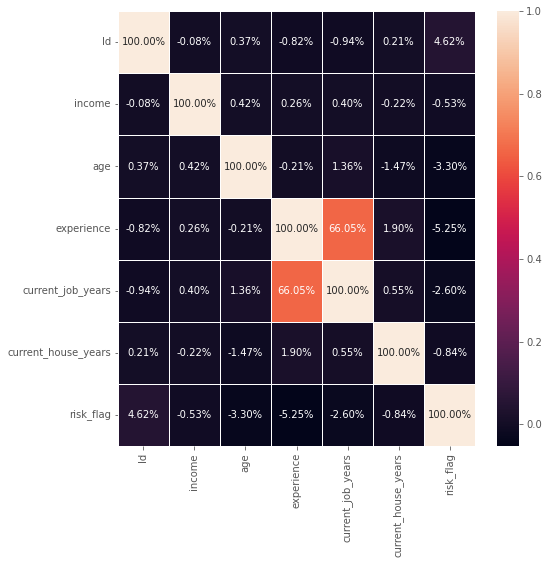

In [703]:
corr_matrix=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2%',linewidth=1.0)
plt.show()


# EDA WITH VISUALIZATION

In [704]:
df1 = df.groupby(['profession','risk_flag']).profession.count()
df1

profession              risk_flag
Air_traffic_controller  0            2049
                        1            1430
Analyst                 0            1948
                        1            1134
Architect               0            1826
                                     ... 
Technician              1            1248
Technology_specialist   0            2035
                        1             772
Web_designer            0            2145
                        1            1178
Name: profession, Length: 102, dtype: int64

In [705]:
#li = ['Id', 'income', 'age', 'experience', 'married', 'house_ownership','car_ownership', 'profession', 'city', 'state', 'current_job_years','current_house_years', 'risk_flag']

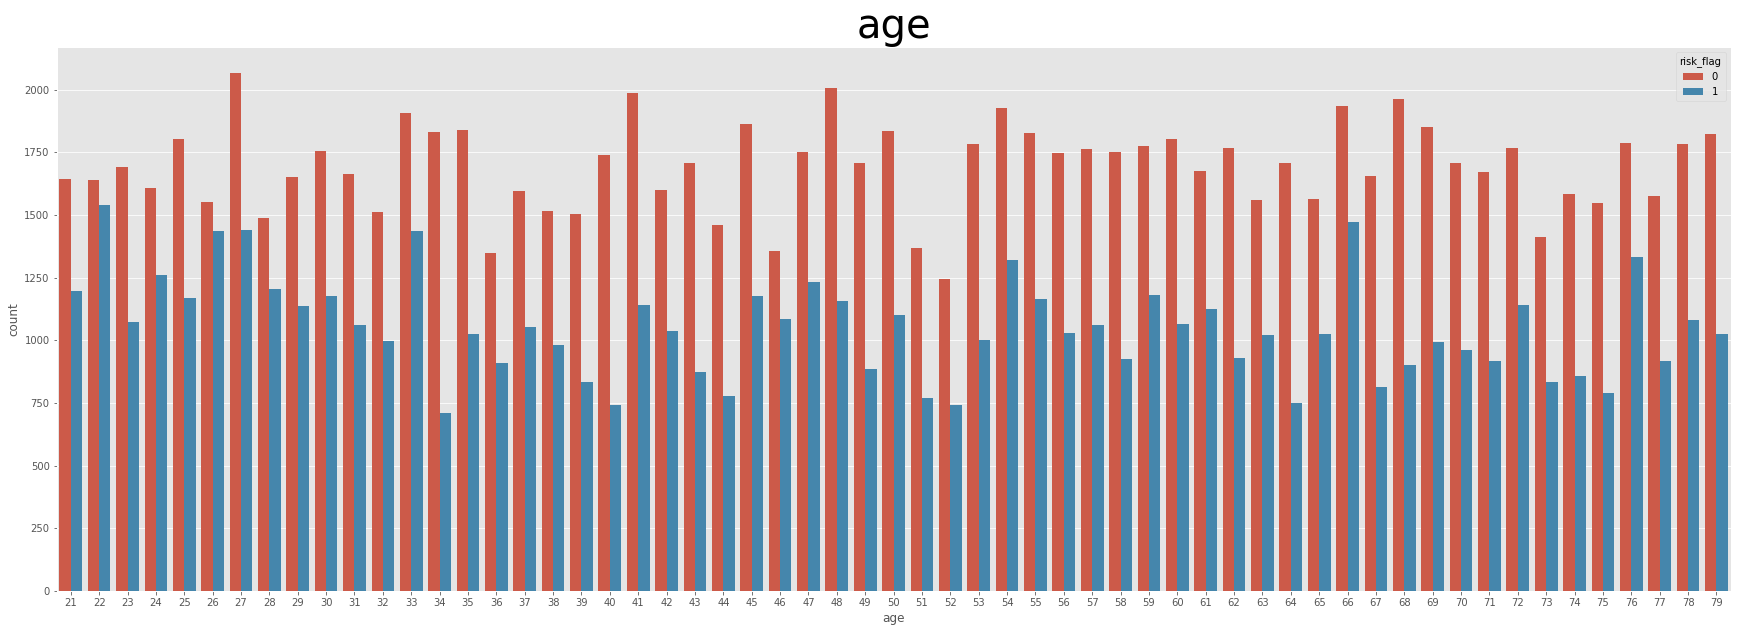

In [706]:
plt.figure(figsize=(30,10))
sns.countplot(x="age", hue="risk_flag", data=data)
plt.title("age", fontsize=40)
plt.show()

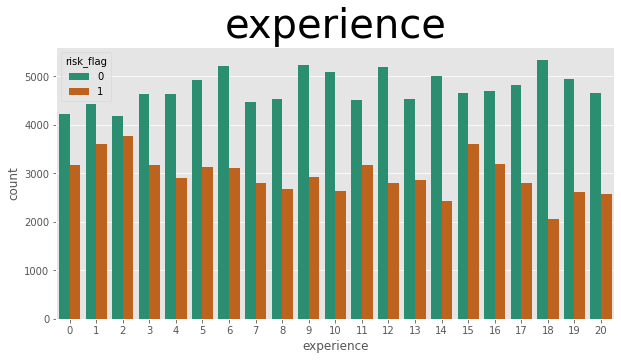

In [737]:
plt.figure(figsize=(10,5))
sns.countplot(x="experience", hue="risk_flag", data=data, palette='Dark2')
plt.title("experience", fontsize=40)
plt.show()

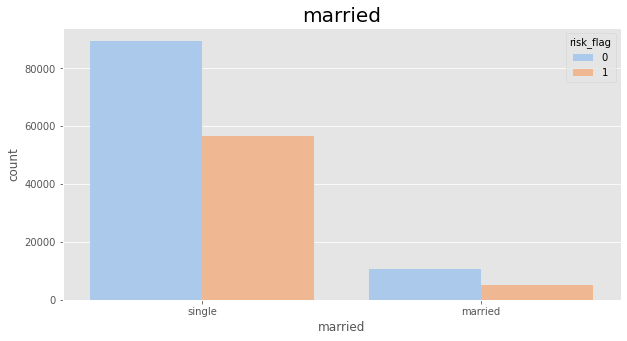

In [738]:
plt.figure(figsize=(10,5))
sns.countplot(x="married", hue="risk_flag", data=data, palette = "pastel")
plt.title("married", fontsize=20)
plt.show()

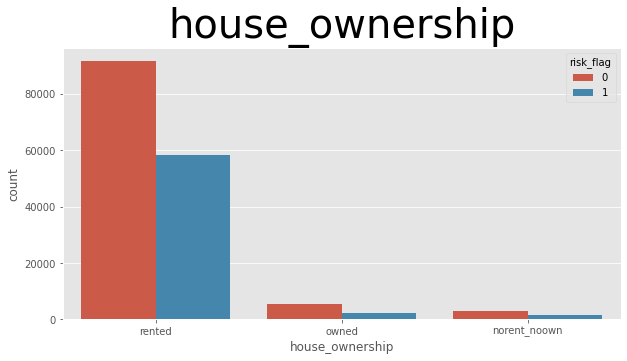

In [739]:
plt.figure(figsize=(10,5))
sns.countplot(x="house_ownership", hue="risk_flag", data=data)
plt.title("house_ownership", fontsize= 40)
plt.show()

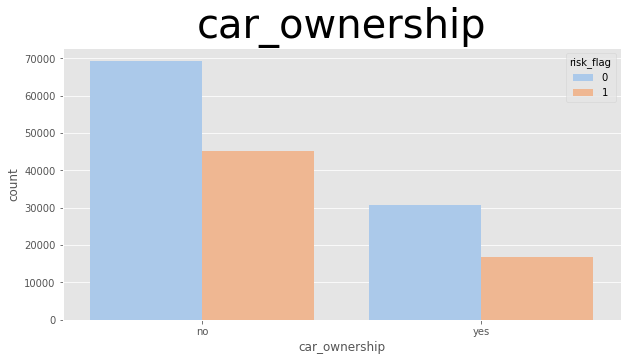

In [740]:
plt.figure(figsize=(10,5))
sns.countplot(x="car_ownership", hue="risk_flag", data=data, palette = "pastel")
plt.title("car_ownership", fontsize= 40)
plt.show()

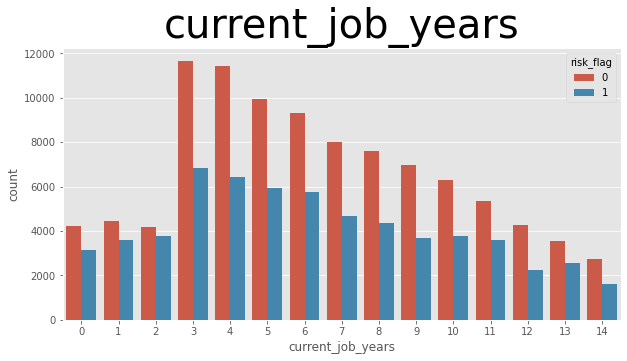

In [741]:
'current_job_years','current_house_years',
plt.figure(figsize=(10,5))
sns.countplot(x="current_job_years", hue="risk_flag", data=data)
plt.title("current_job_years", fontsize= 40)
plt.show()

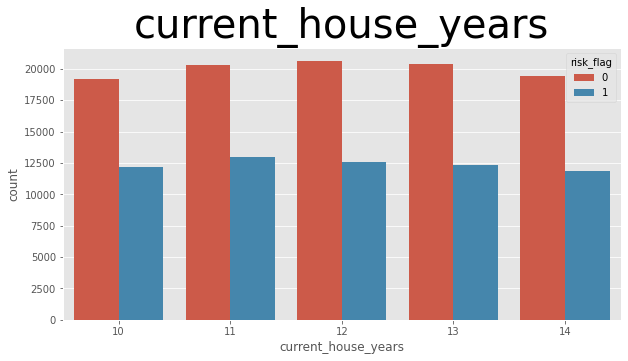

In [742]:
plt.figure(figsize=(10,5))
sns.countplot(x="current_house_years", hue="risk_flag", data=data)
plt.title("current_house_years", fontsize= 40)
plt.show()

In [713]:
import plotly.express as px
fig1 = px.scatter_3d(df, x = 'current_job_years', 
                     y = 'experience',
                     z = 'current_house_years',
                   color='risk_flag',
                   opacity=0.7)

fig2 = px.scatter_3d(df, x = 'age', 
                     y = 'income',
                     z = 'profession',
                   color='risk_flag',
                   opacity=0.7)
#fig.show(renderer='iframe')
fig1.show(renderer='iframe_connected')
#fig2.show(renderer='colab')

In [ ]:
fig2.show(renderer='iframe_connected')

In [714]:
income_distribution = df[['profession' , 'income']].groupby('profession').sum().reset_index()
income_distribution.iloc[0:10, :]

,profession,income
0,Air_traffic_controller,17049252162
1,Analyst,15207993691
2,Architect,15548532681
3,Army_officer,17464353394
4,Artist,15331087850
5,Aviator,15733447057
6,Biomedical_Engineer,16934173011
7,Chartered_Accountant,15833027353
8,Chef,14823934879
9,Chemical_engineer,17694320912


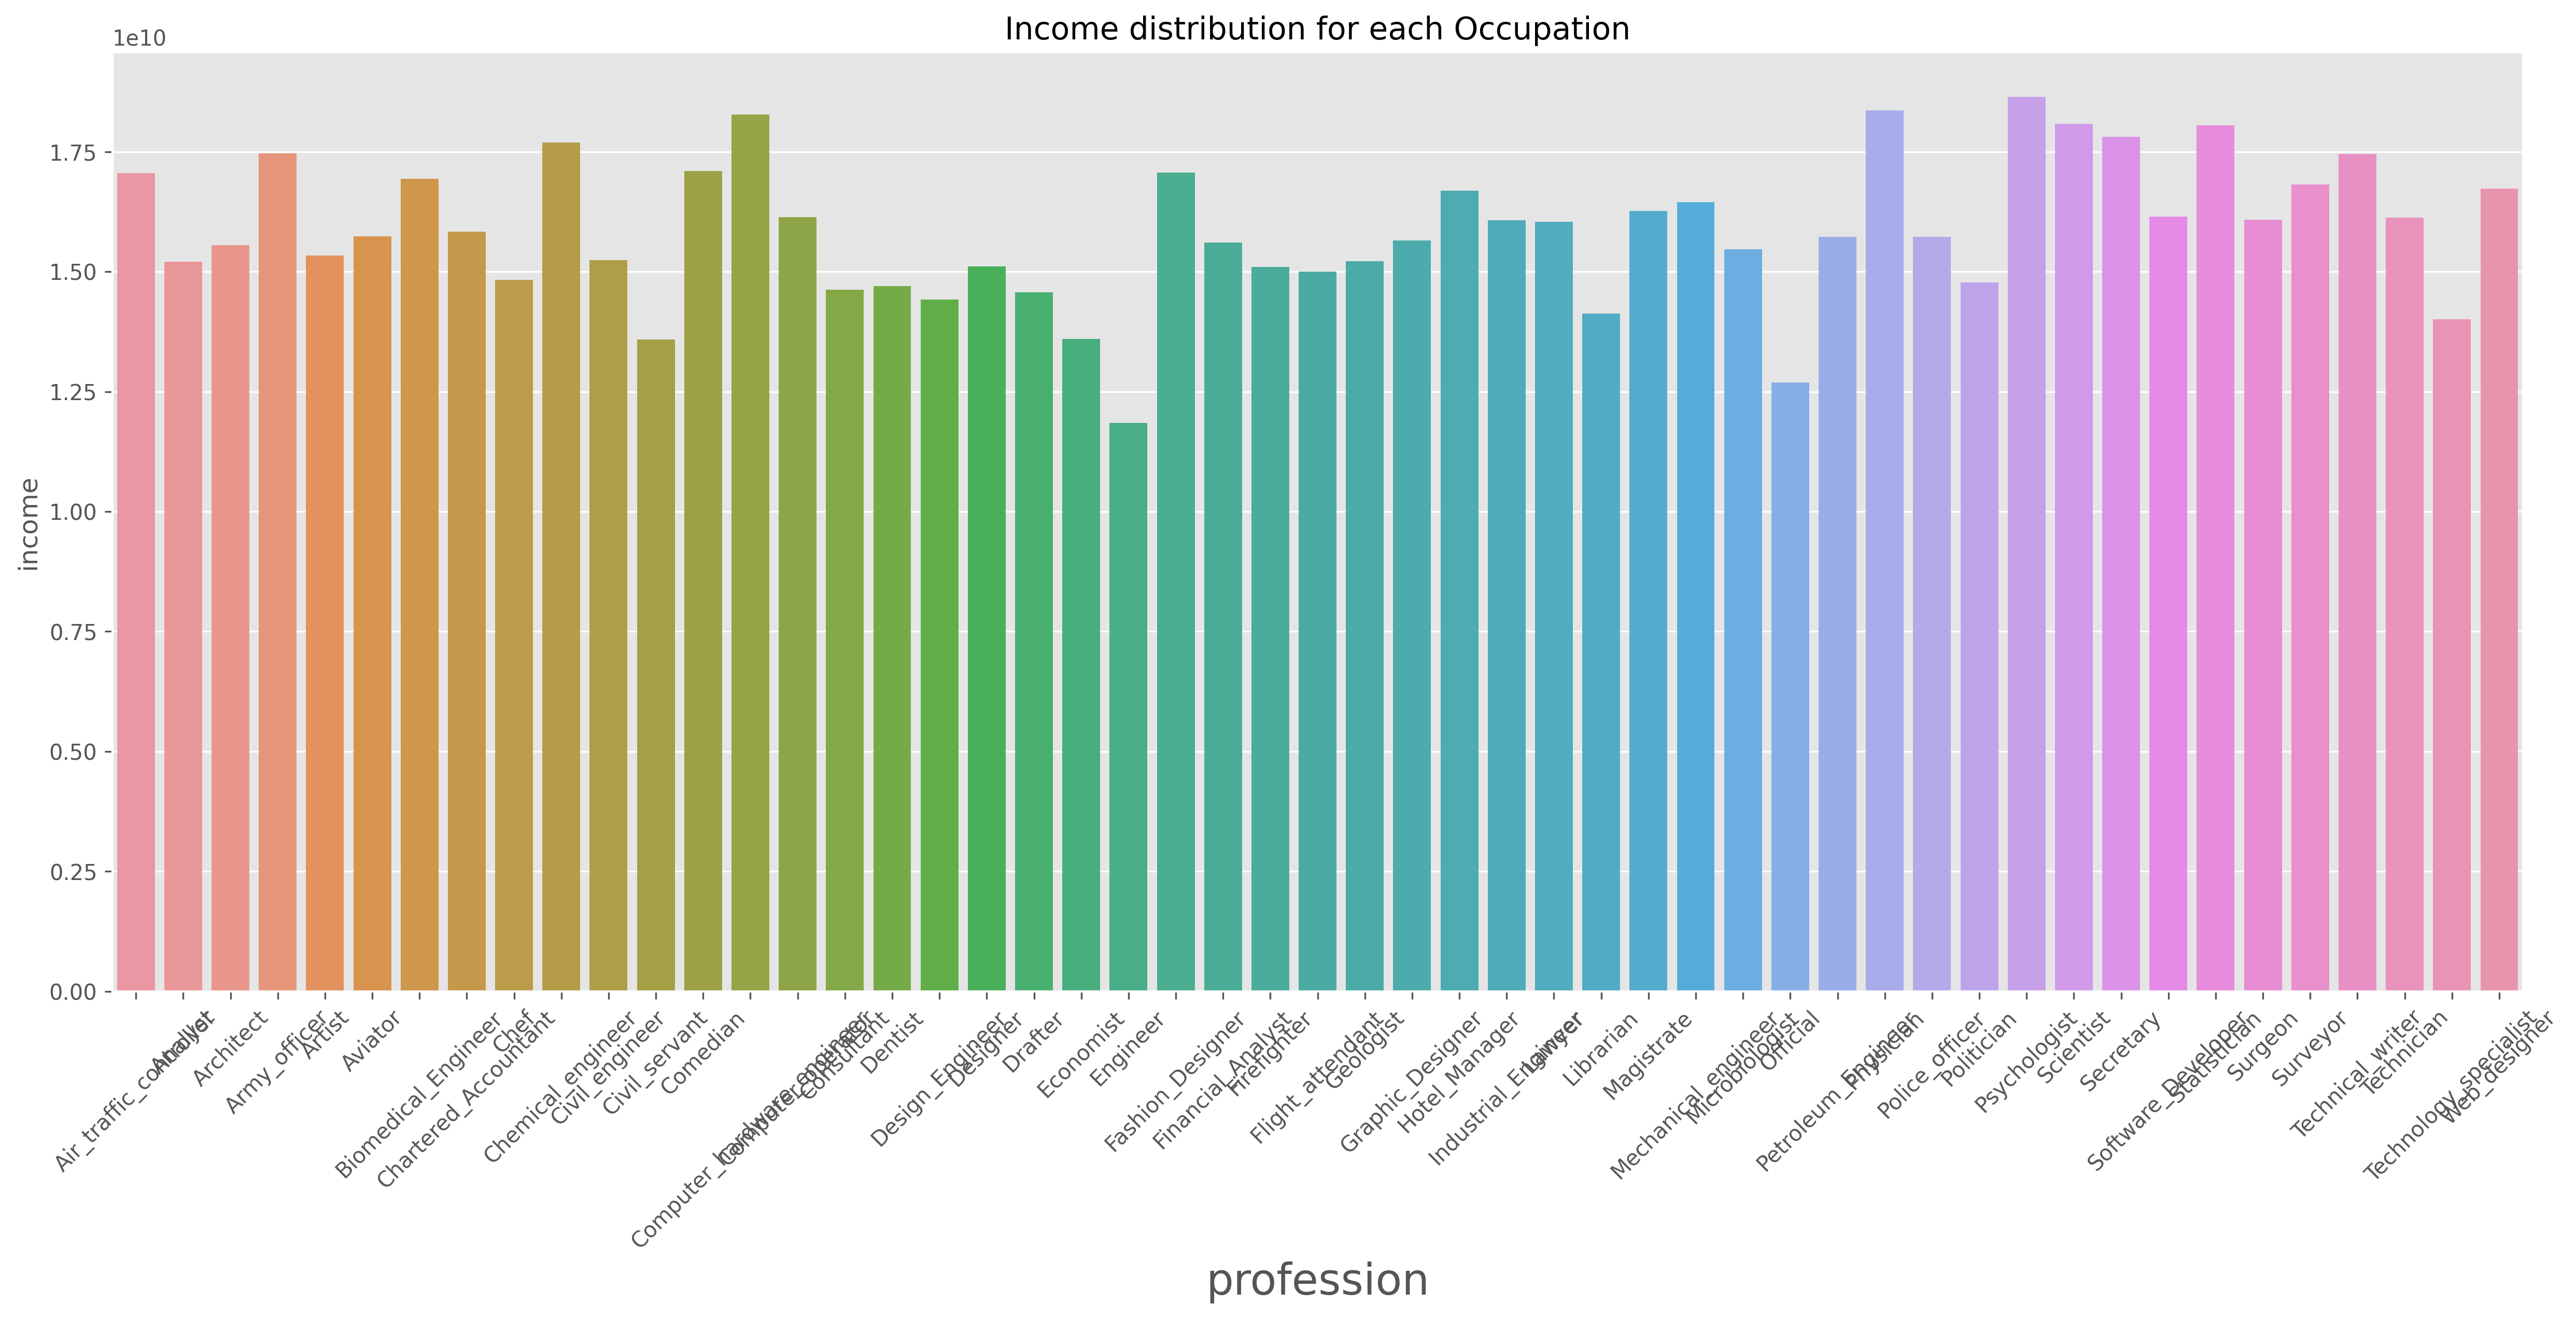

In [743]:
plt.figure(figsize=(20,8), dpi=300)
plt.xticks(rotation=45)
plt.title('Income distribution for each Occupation')
sns.barplot(data=income_distribution, x='profession', y='income')
plt.xlabel('profession',size=20)
plt.show()

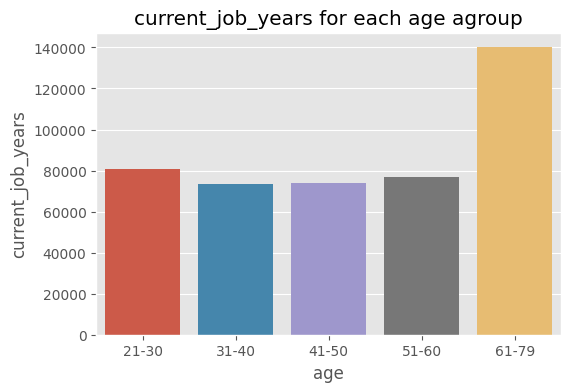

In [716]:
plt.figure(figsize=(6,4), dpi=100)
plt.title('current_job_years for each age agroup')
sns.barplot(data=account_distribution, x='age', y='current_job_years')
plt.show()

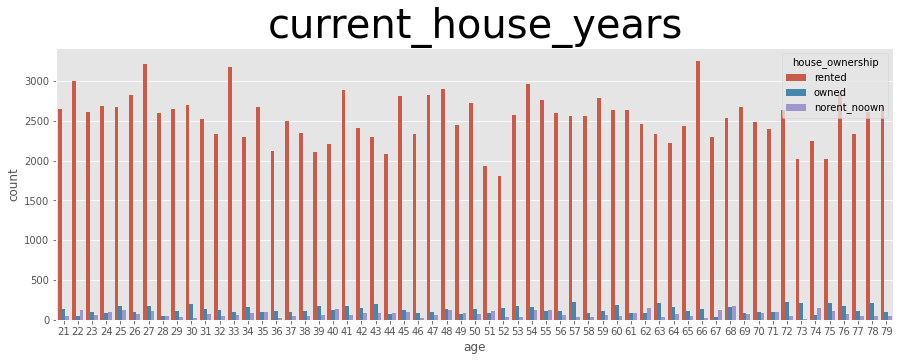

In [745]:
plt.figure(figsize=(15,5))
sns.countplot(x="age", hue="house_ownership", data=data)
plt.title("current_house_years", fontsize= 40)
plt.show()

Relationship between current_job_years and experience distribution in Data along with profession
positive correlation between denoted by a line plot below.¶

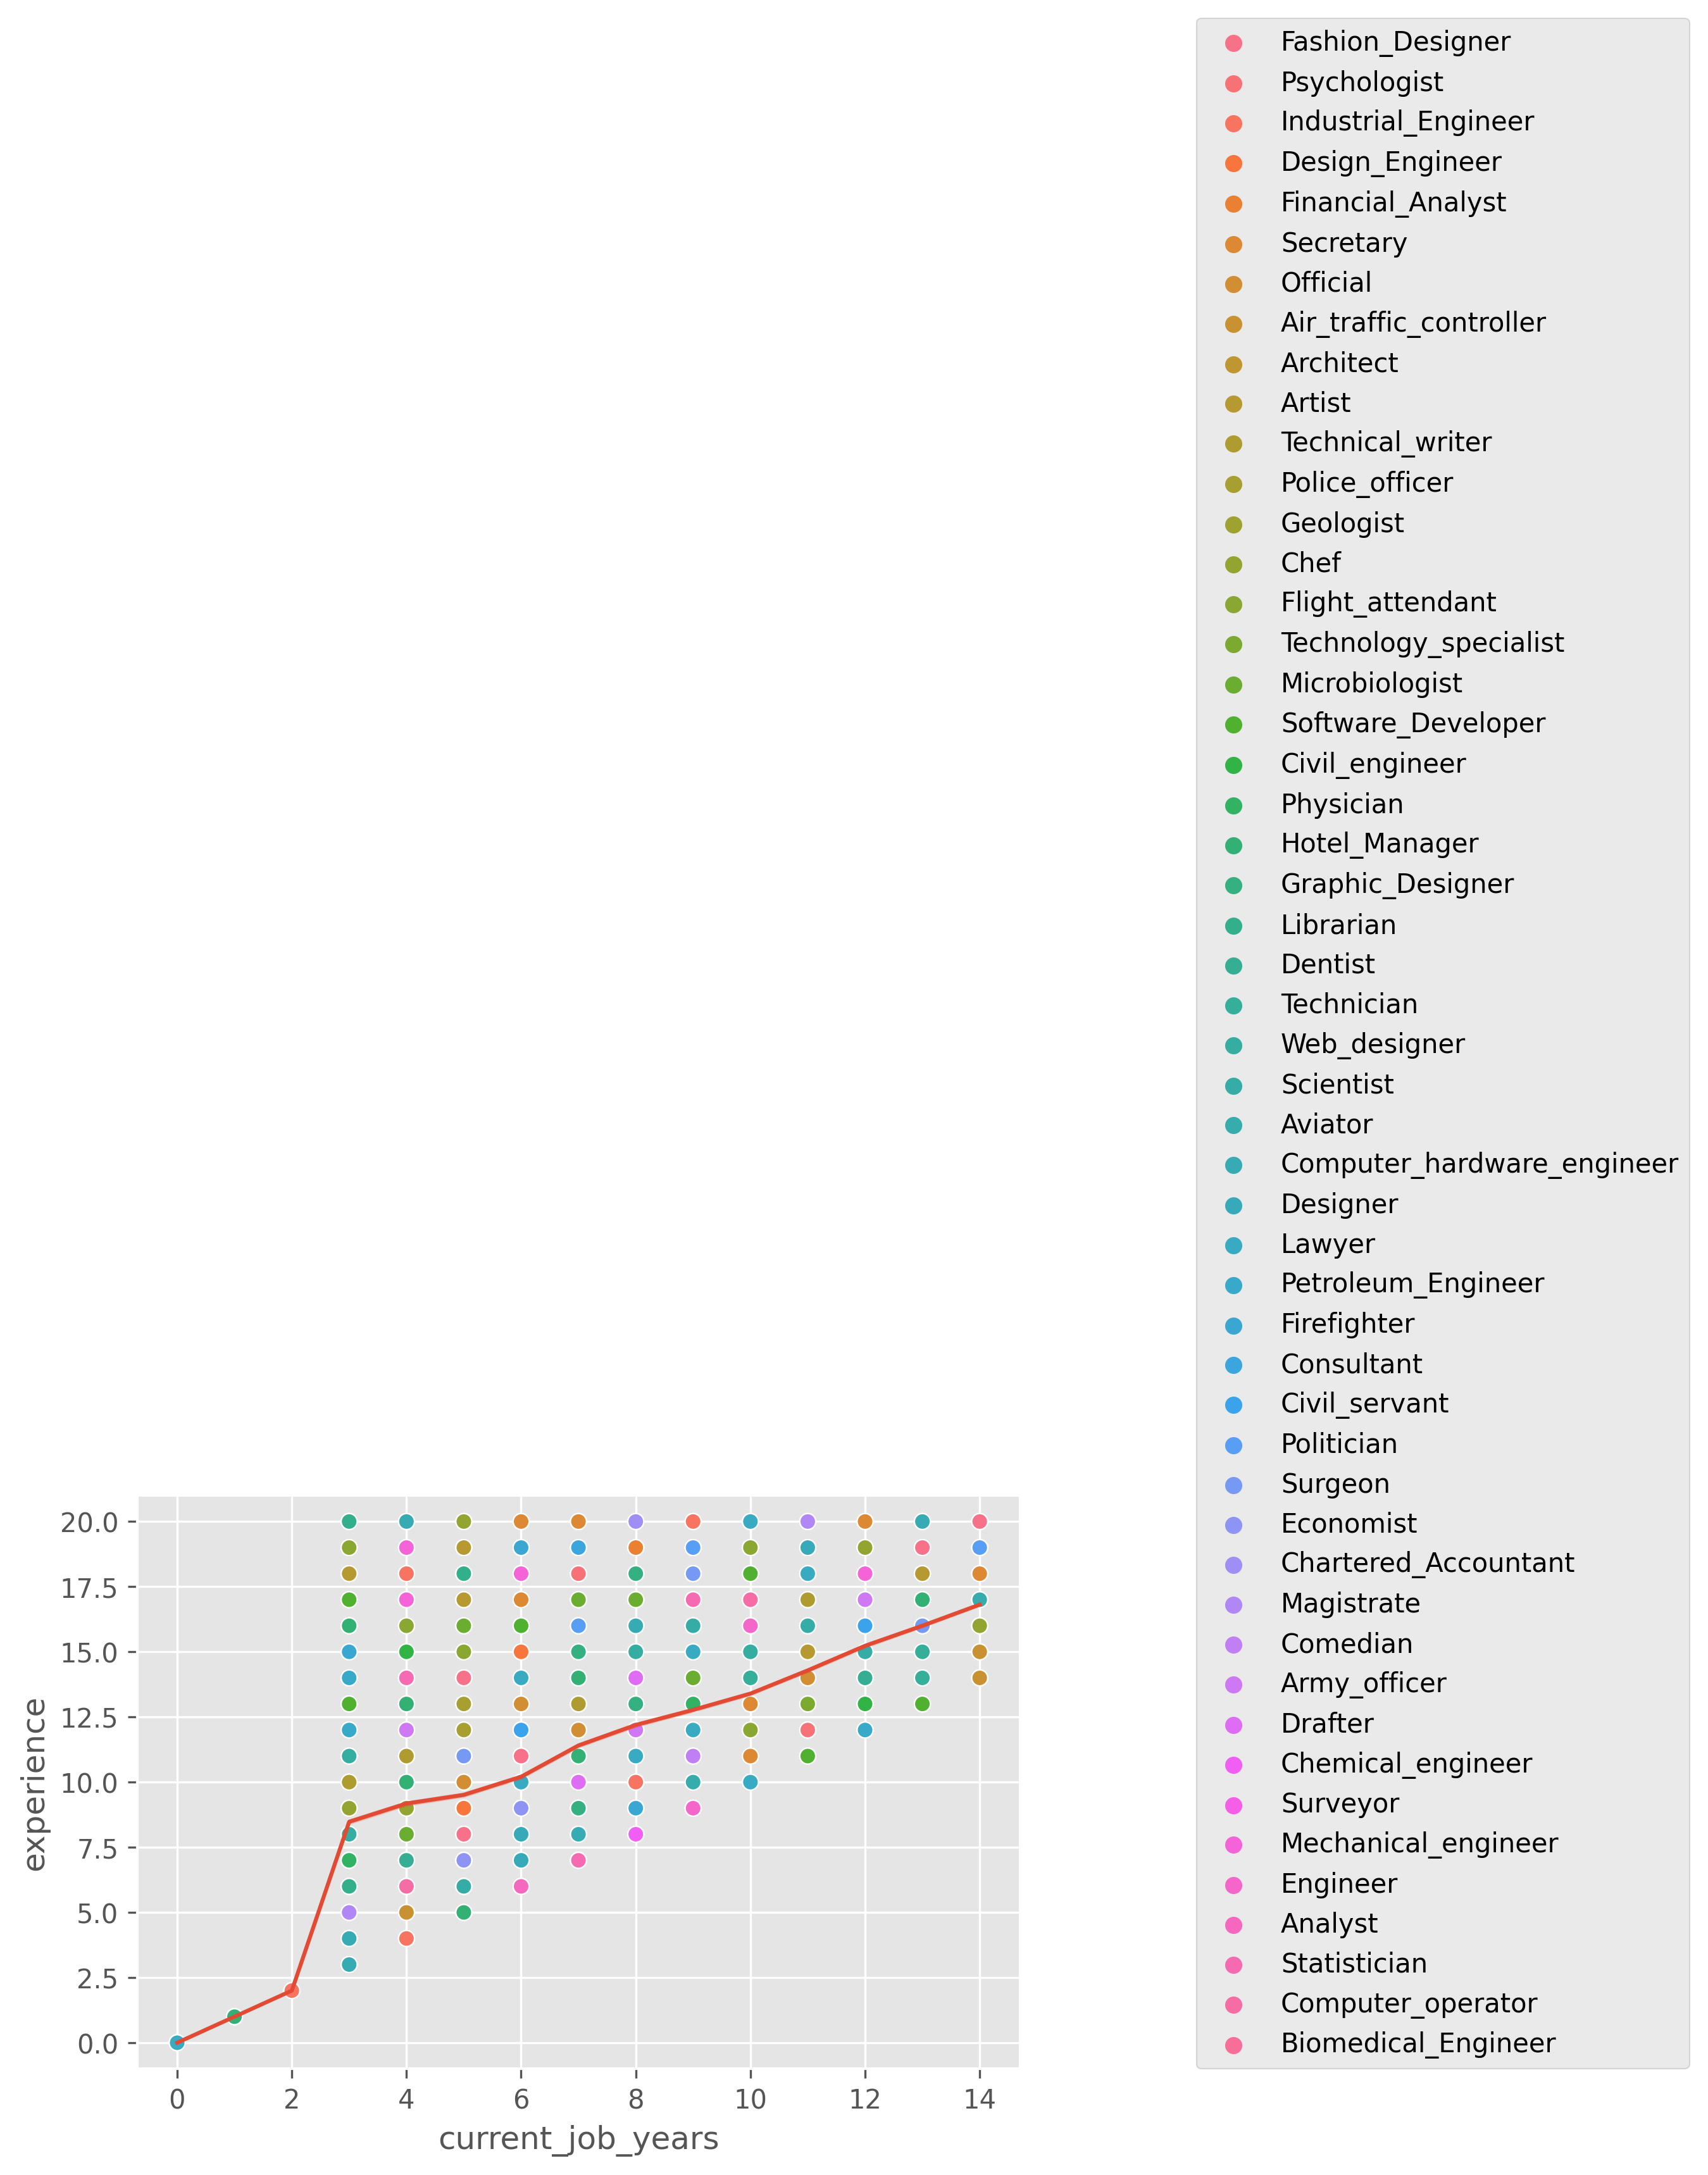

In [718]:
plt.figure(figsize=(6,4), dpi=300)
sns.scatterplot(data=df, x='current_job_years', y='experience', hue='profession')
sns.lineplot(data=df, x='current_job_years', y='experience')
plt.legend(loc=(1.2, 0))
plt.show()

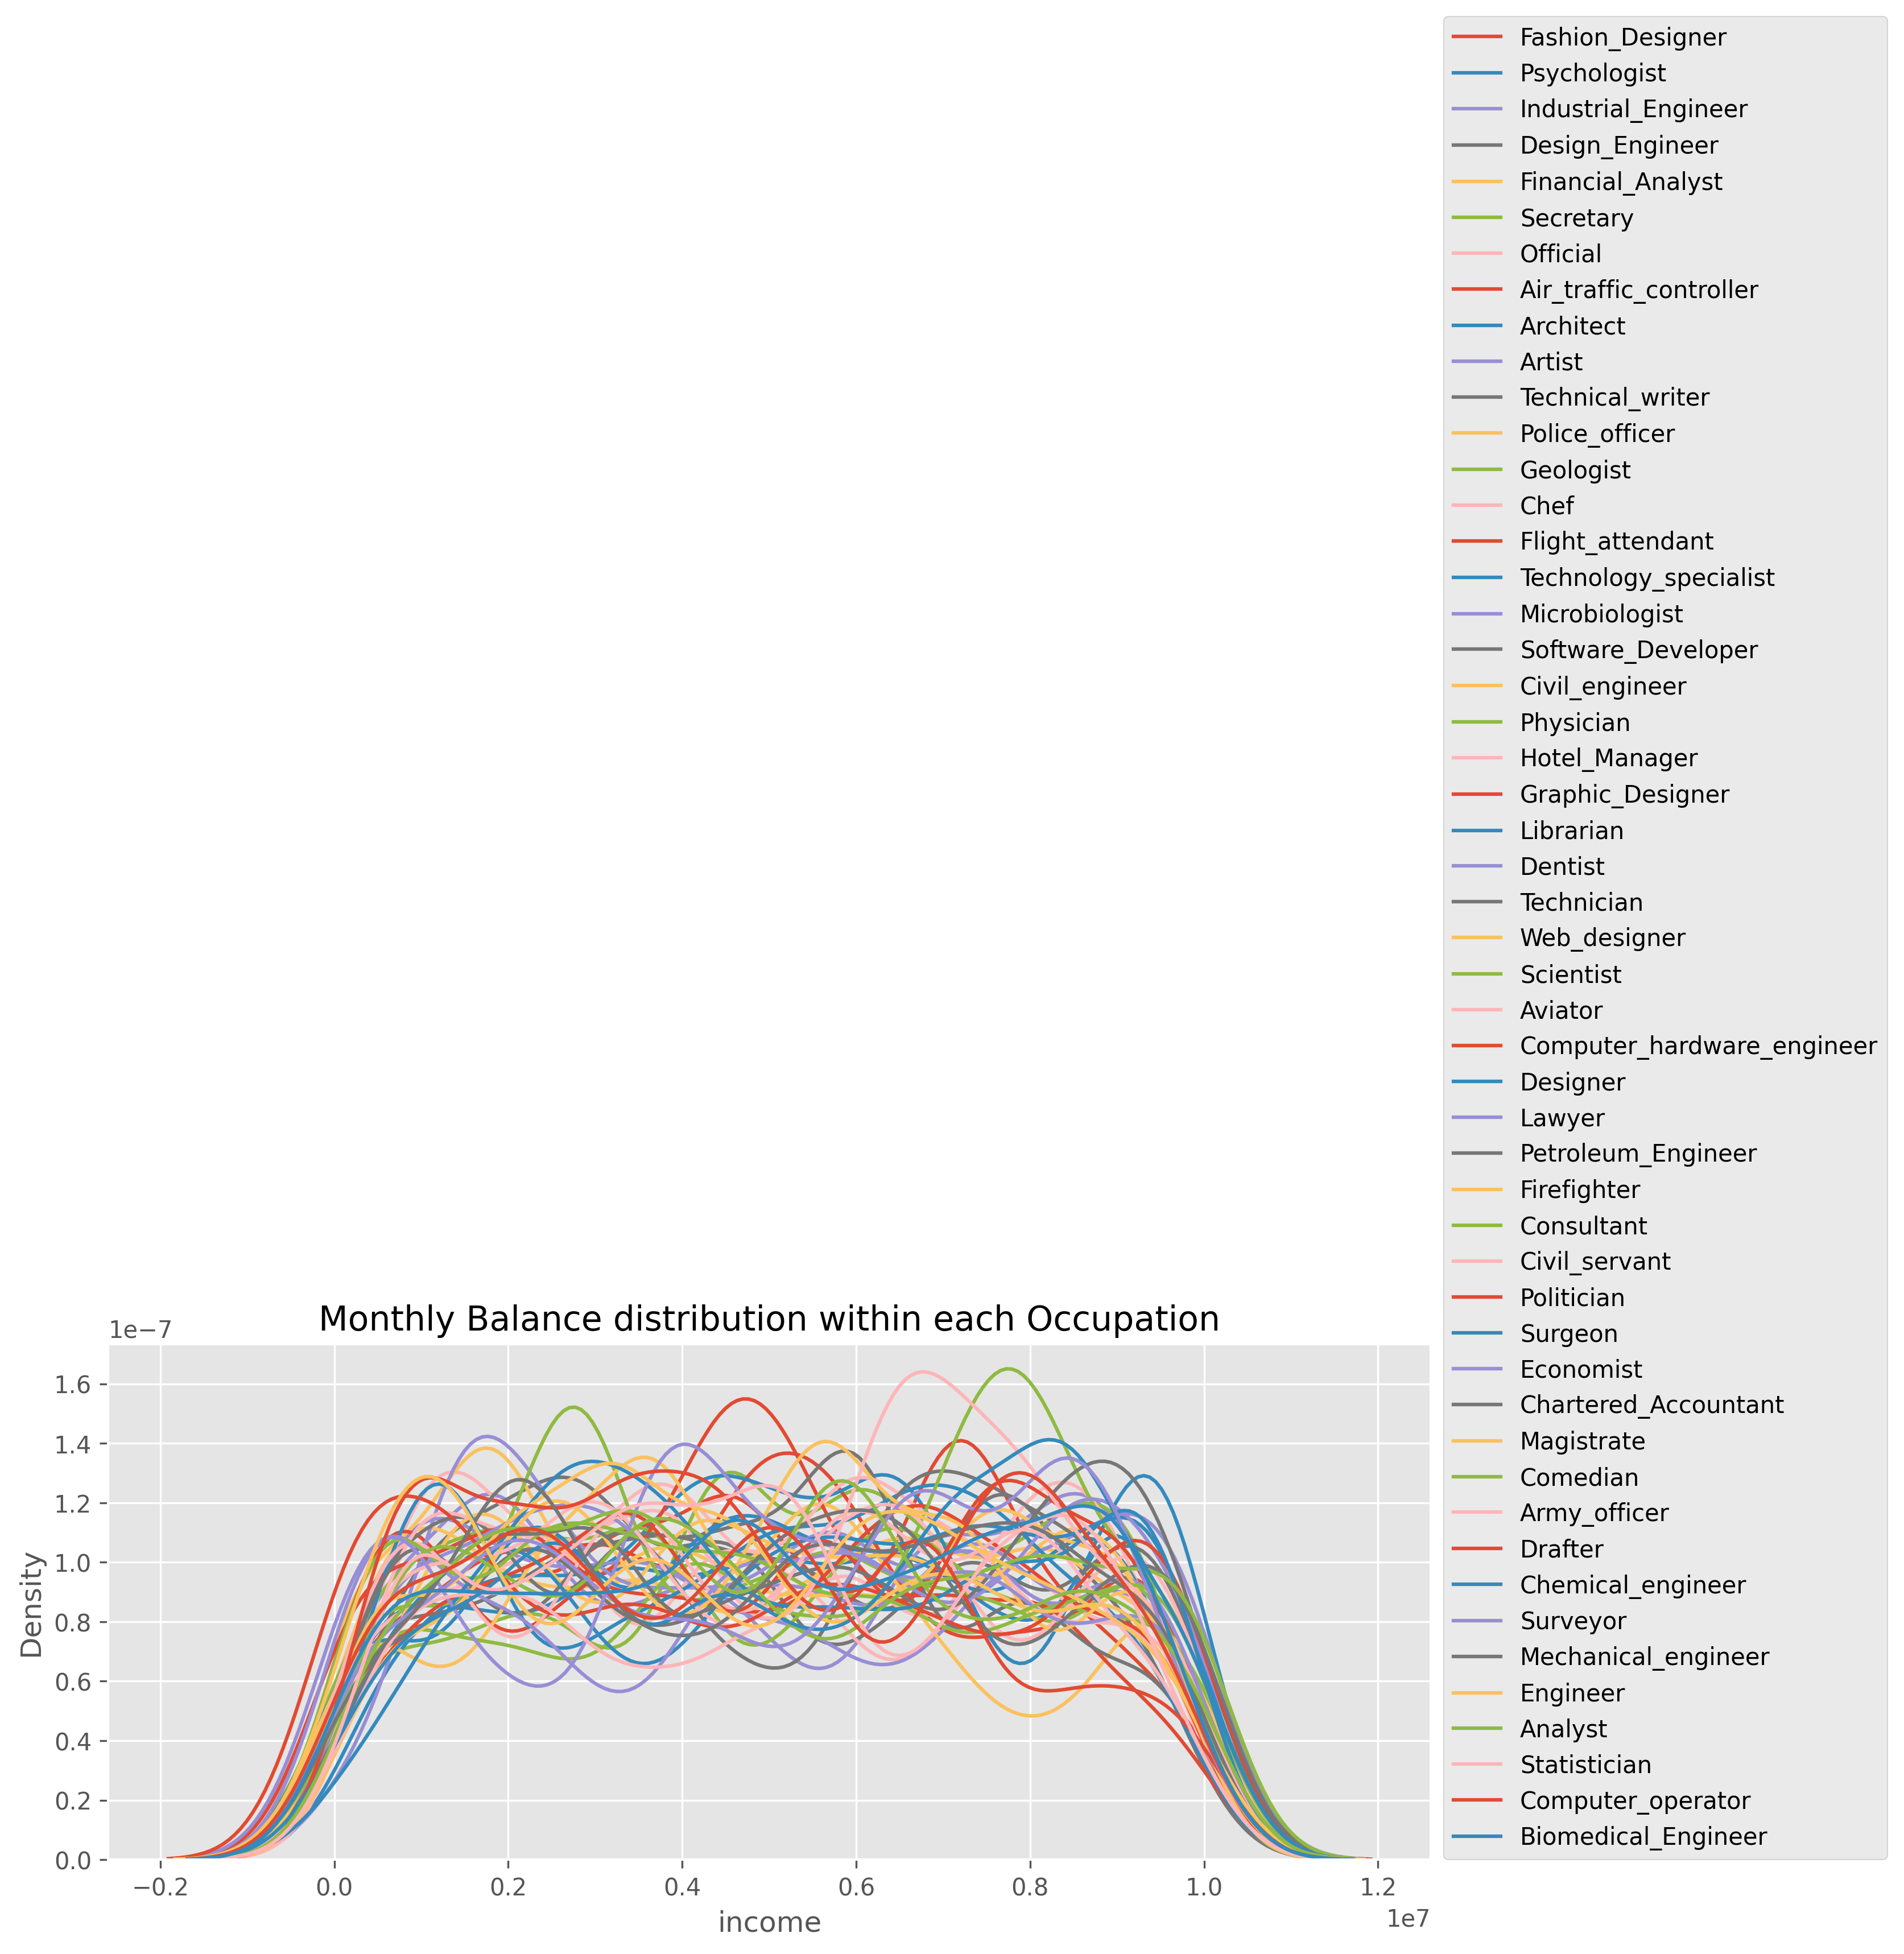

In [719]:
plt.figure(figsize=(10,4), dpi=300)
plt.title('Monthly Balance distribution within each Occupation')
for i in df.profession.unique():
    sns.kdeplot(x='income', data=df[df.profession == i], label=i)
plt.legend(loc=(1.01,0))
plt.show()

# Experimenting with different features

In [720]:
drop_cols = ['Id','city']
#onehot encoded columns
target_col = ['current_house_years','experience','profession','state','married','car_ownership','house_ownership','current_job_years']
#label encoded columns
object_cols=[]

df = df.drop(drop_cols,axis = 1)

# Handling Our Categorial Data

we have used OneHotEncoder and applied it on 'profession','car_ownership','house_ownership','married' . This combination is selected by repeated test run and best combination is selected

In [722]:
from sklearn.preprocessing import OneHotEncoder
'''extracting encoded data'''
enc=OneHotEncoder(handle_unknown='ignore', sparse=False)
enc_data = pd.DataFrame(enc.fit_transform(df[target_col]))

one_hot_encoded_data = pd.get_dummies(df, columns = target_col)

'''updating our dataset without distroying our raw dataframe'''
df_new = df.join(enc_data)
df_new.columns = df_new.columns.astype('str')
df_new = df_new.drop(target_col,axis = 1)


In [723]:
'''our y as y_data'''
y_data = df_new['risk_flag']

'''our x as x_data'''
x_data = df_new.drop(['risk_flag'],axis = 1)


# Spliting Our Data for Training and Testing

In [724]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_data,y_data,random_state=47,test_size=0.20)

# Scaling Using Standard Scaler
standard scaler is used because  MinMaxScaler is giving low accuracy . everything is selected after multiple test run . To understand our test run you can refer to our research file

In [725]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaled_col= ['income','age']
scaler=StandardScaler()
X_train.loc[:,scaled_col] = scaler.fit_transform(X_train.loc[:,scaled_col])
X_test.loc[:,scaled_col] = scaler.transform(X_test.loc[:,scaled_col])

# BEST FEATURE SELECTION


higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.
The test is applied after preprocessing of data

from sklearn.feature_selection import chi2
chi_scores = chi2(X_train,Y_train)
chi_scores 

p_values = pd.Series(chi_scores[1],index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

The higher the p-value, variables will be independent of the repsone and can not be considered for model training

# MULTIPLE MODEL TRAINING 

In [726]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(max_iter=5000, random_state=2017)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=5000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [727]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, Y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, Y_test)
    precision[key] = precision_score(predictions, Y_test)
    recall[key] = recall_score(predictions, Y_test)
    f1[key] = f1_score(predictions, Y_test)
 
    print(np.unique(predictions,return_counts = True))
    

(array([0, 1], dtype=int64), array([30106,  2293], dtype=int64))
(array([0, 1], dtype=int64), array([30334,  2065], dtype=int64))
(array([0, 1], dtype=int64), array([17757, 14642], dtype=int64))
(array([0, 1], dtype=int64), array([18632, 13767], dtype=int64))
(array([0, 1], dtype=int64), array([16491, 15908], dtype=int64))


C:\Users\ansht\AppData\Local\Programs\Python\Python39\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



(array([0, 1], dtype=int64), array([19410, 12989], dtype=int64))


In [728]:
print("Metrics on X_test")
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','f1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['f1'] = f1.values()


df_model

Metrics on X_test


,Accuracy,Precision,Recall,f1
Logistic Regression,0.620019,0.099152,0.540340,0.167557
Support Vector Machines,0.619649,0.089549,0.541889,0.153698
Decision Trees,0.907466,0.965909,0.824341,0.889528
Random Forest,0.924226,0.952625,0.864676,0.906522
Naive Bayes,0.559246,0.565141,0.443928,0.497254
K-Nearest Neighbor,0.866940,0.847231,0.815074,0.830842


Text(0.5, 257.44, 'Predicted label')

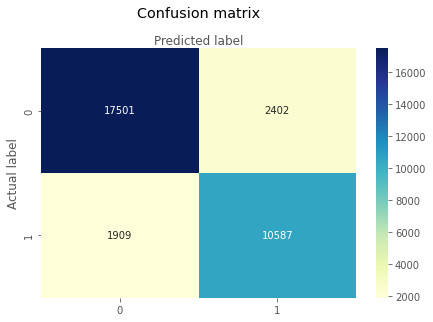

In [729]:
cnf_matrix = metrics.confusion_matrix(Y_test, predictions) 
cnf_matrix 
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 

# create heatmap 

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top")  
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

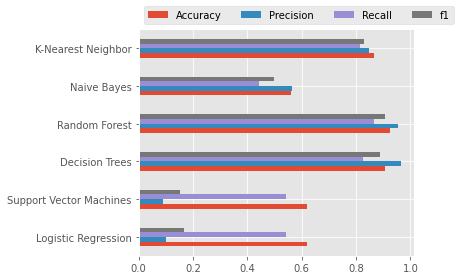

In [730]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

**We have experimented this code on different columns being dropped, scaled, encoded given in word document**

In genral banking system knn is used for loan approval testing but capital owned by the person is dominant feature. And many people due to this are unable to approve their loan. To solve this problem we have removed such kind of data and features. We have tried various models like logistic regression , Support Vector Machines , Decision Treesision, Random Forest, Naive Bayes and Neural Network but Knn gives the best result.refer our word document

# Hyper parameter Tuning

We will use three hyperparamters- n-neighbors, weights and metric.

n_neighbors: Decide the best k based on the values we have computed earlier.

weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.

metric: The distance metric to be used will calculating the similarity.

leaf_size:Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree.

error_rate = []
mean_acc = []



# n_neighbors

In [731]:
from sklearn.neighbors import KNeighborsClassifier
clasify = KNeighborsClassifier(n_neighbors=3, weights='distance',leaf_size=5)
x_help = X_train.copy()
y_help = Y_train.copy()
clasify.fit(x_help,y_help)

KNeighborsClassifier(leaf_size=5, n_neighbors=3, weights='distance')

In [733]:
y_pred=clasify.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df_model1 = pd.DataFrame(index=[0],columns=['Accuracy', 'Precision', 'Recall','f1'])
df_model1['Accuracy'] = accuracy_score(y_pred, Y_test)
df_model1['Precision'] = precision_score(y_pred, Y_test)
df_model1['Recall'] = recall_score(y_pred, Y_test)
df_model1['f1'] = f1_score(y_pred, Y_test)
df_model1.head()

,Accuracy,Precision,Recall,f1
0,0.888577,0.921015,0.814393,0.864428


In [736]:
error_rate = []
mean_acc = []

# Will take some time
for i in range(1,15,2):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_help,y_help)
    y_p = knn.predict(X_test)
    error_rate.append(np.mean(y_p != Y_test))
    mean_acc.append(metrics.accuracy_score(Y_test, y_p))

C:\Users\ansht\AppData\Local\Programs\Python\Python39\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\ansht\AppData\Local\Programs\Python\Python39\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

Text(0, 0.5, 'Error Rate')

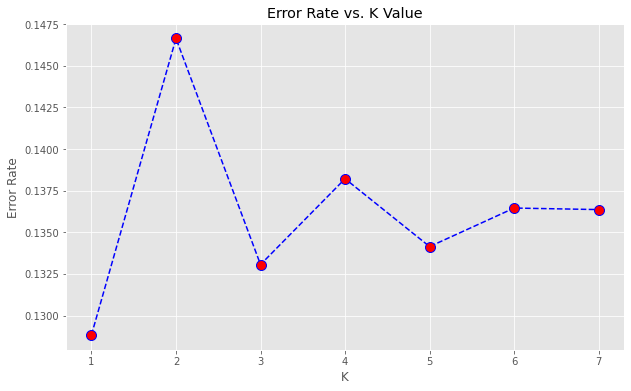

In [746]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8), error_rate ,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

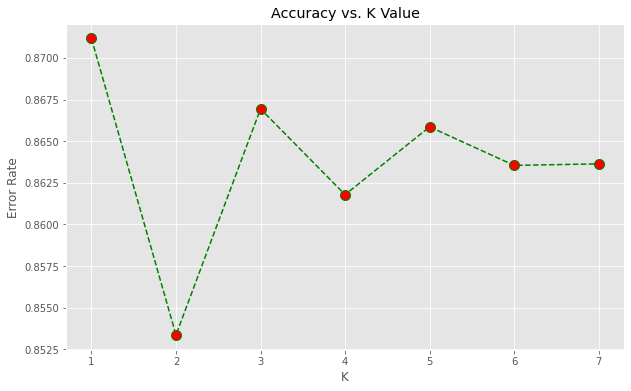

In [747]:
plt.figure(figsize=(10,6))
plt.plot(range(1,8),mean_acc ,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# weights

In [748]:
error_rate = []
mean_acc = []
weights = ['uniform','distance']
# Will take some time
for i in weights:
    
    knn = KNeighborsClassifier(n_neighbors=3, weights=i)
    knn.fit(x_help,y_help)
    y_p = knn.predict(X_test)
    error_rate.append(np.mean(y_p != Y_test))
    mean_acc.append(metrics.accuracy_score(Y_test, y_p))

C:\Users\ansht\AppData\Local\Programs\Python\Python39\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



Text(0, 0.5, 'Error Rate')

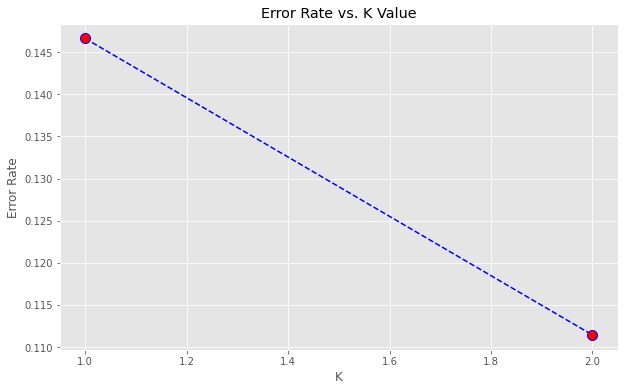

In [749]:
plt.figure(figsize=(10,6))
plt.plot(range(1,3), error_rate ,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

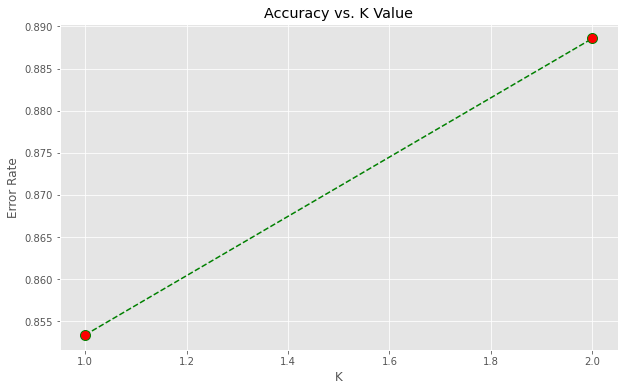

In [750]:
plt.figure(figsize=(10,6))
plt.plot(range(1,3),mean_acc ,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# leaf_size

In [752]:
for i in range(1,50,5):
    knn = KNeighborsClassifier(n_neighbors=3,leaf_size=i)
    knn.fit(x_help,y_help)
    y_p = knn.predict(X_test)
    error_rate.append(np.mean(y_p != Y_test))
    mean_acc.append(metrics.accuracy_score(Y_test, y_p))

C:\Users\ansht\AppData\Local\Programs\Python\Python39\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\ansht\AppData\Local\Programs\Python\Python39\sklearn\neighbors\_classification.py:237: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to a

Text(0, 0.5, 'Error Rate')

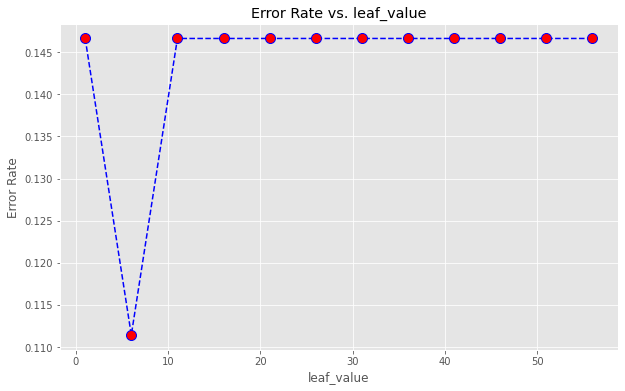

In [753]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60,5), error_rate ,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. leaf_value')
plt.xlabel('leaf_value')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

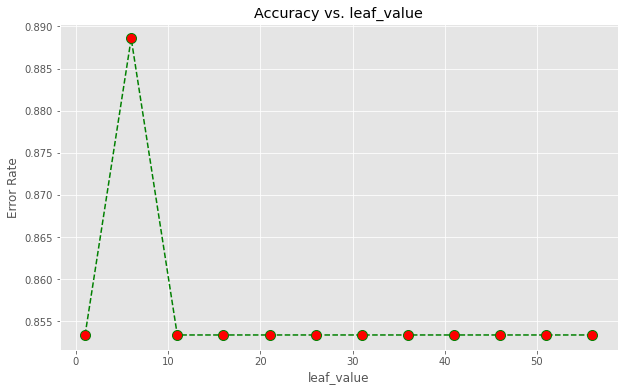

In [754]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60,5),mean_acc ,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. leaf_value')
plt.xlabel('leaf_value')
plt.ylabel('Error Rate')